<div class="alert alert-info" >
    
# <div class="alert alert-success" >The IMDB dataset
### Binary classification:
Two-class classification, or binary classification, may be the most widely applied kind of machine-learning problem. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.
</div>
    
<div class= "alert alert-danger"> <b>The IMDB dataset:</b>
    
- Total reviews:    50,000 highly polarized reviews from the Internet Movie Database
- Training dataset: 25,000 reviews
- Testing dataser:  25,000 reviews
- Each set consisting of 50% negative and 50% positive reviews.
</div>    
<div class= "alert alert-success"><b>Why use separate training and test sets?</b>  
    
Because you should never test a machinelearning model on the same data that you used to train it! Just because a model performs well on its training data doesn’t mean it will perform well on data it has never seen; and what you care about is your model’s performance on new data (because you already know the labels of your training data—obviously you don’t need your model to predict those). For instance, it’s possible that your model could end up merely memorizing a mapping between your training samples and their targets, which would be useless for the task of predicting targets for data the model has never seen before. 
</div>
The IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary. The following code will load the dataset (when you run it the first time, about 80 MB of data will be downloaded to your machine).    


In [1]:
from tensorflow.keras.datasets import imdb

##### <div class= "alert alert-warning"> Loading the IMDB dataset 


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<b>num_words:</b> 
- num_words = integer / None
- Words are ranked by how often they occur (in the training set) and only the `num_words` most frequent words are kept. Any less frequent word will appear as `oov_char` value in the sequence data.
- If num_words = None, all words are kept
- By defaults num_words = None, so all words are kept.


The argument <b> num_words=10000</b> means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size. 


In [3]:
len(train_data)           # size of training data

25000

In [4]:
len(train_data[0])

218

In [5]:
len(train_labels)        # size of training data labels

25000

In [6]:
len(test_data)         # size of test data

25000

In [7]:
len(test_labels)        # size of test data labels

25000

###### <div class= "alert alert-success"> Text preprocessing:
The various text preprocessing steps are:
    
-  Refining the text: 
    * <b>Lower casing:</b> Converting each word to lower case
    * <b>punctuations marks removal:</b> All the punctuation marks can be removed from a list of words by excluding any alphanumeric element.
    * <b>Stop words removal:</b>  Stop words are very commonly used words (a, an, the, etc.) in the documents. These words do not really signify any importance as they do not help in distinguishing two documents.Stop words are a collection of words that occur frequently in any language but do not add much meaning to the sentences. These are common words that are part of the grammar of any language. Every language has its own set of stop words. For example some of the English stop words are “the”, “he”, “him”, “his”, “her”, “herself” etc.
    * <b>Stemming:</b> It is a process of transforming a word to its root form or stem.e.g "Machine Learning is exciting">>> "machin learn is excite"
    * <b>Lemmatization:</b> Unlike stemming, lemmatization reduces the words to a word existing in the language.
    * <b>Tokanization:</b>  Splitting the sentence into words.


These various text preprocessing steps are widely used for dimensionality reduction.

    
- <b> Vocabelary:</b> Each word in the 50,000 reviews is counted and listed. The word with the highest occurance is at the top and the word with less occuranc compare to the top word afer it so on following a desendind order. Then num_words (10,000 in this example) most frequent words at the top are selected.

- <b> Vectorization:</b> Each of the selected num_words is encoded with a number. Tokenization divides the texts into words or smaller sub-texts, which will enable good generalization of relationship between the texts and the labels. This determines the “vocabulary” of the dataset (set of unique tokens present in the data). whereas Vectorization define a good numerical measure to characterize these texts.
 
    

The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words i.e vectorized). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
train_labels[1]

0

Because you’re restricting yourself to the top 10,000 most frequent words , no word index will exceed 10,000 (meaning minimum token will bw 0 and maximum token will be 9999):

In [10]:
max([max(sequence) for sequence in train_data])

9999

##### <div class= "alert alert-warning">Preparing the data (vectorizing the data)</div>
    
You can’t feed lists of integers into a neural network (converting integer numbers to catagorical data). You have to turn your lists into tensors. There are two ways to do that:
    
- Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer).
    
- One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data. 
    
Let’s go with the latter solution to vectorize the data, which you’ll do manually for maximum clarity.
    
#### Encoding the integer sequences into a binary matrix (Binary encoding)

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))   # Creates an all-zero matrix of shape (len(sequences),dimension)
    
    for i, sequence in enumerate(sequences):
        
        results[i, sequence] = 1.                   # Sets specific indices of results[i] to 1s (1. means its a floating point) 
    return results

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Here’s what the samples look like now:

In [13]:
x_train[0]# bow >>>> BAG OF WORDS technique (modified version of one hot encoderSample Paper – M.S Applied Psychology)

array([0., 1., 1., ..., 0., 0., 0.])

You should also vectorize your labels, which is straightforward because in binary encoding labels are only two i.e 0 and 1:

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now the data is ready to be fed into a neural network.

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

Finally, you need to choose a loss function and an optimizer. Because you’re facing a binary classification problem and the output of your network is a probability (you end your network with a single-unit layer with a sigmoid activation), it’s best to use the binary_crossentropy loss. It isn’t the only viable choice: you could use, for instance, mean_squared_error. But crossentropy is usually the best choice when you’re dealing with models that output probabilities.` Crossentropy is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.` Here’s the step where you configure the model with the rmsprop optimizer and
the binary_crossentropy loss function. Note that you’ll also monitor accuracy
during training.

##### <div class= "alert alert-warning">Compiling the model

In [16]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

# model.compile(optimizer='Adadelta',loss='binary_crossentropy',metrics=['accuracy'])

You’re passing your optimizer, loss function, and metrics as strings, which is possible because rmsprop, binary_crossentropy, and accuracy are packaged as part of Keras. Sometimes you may want to configure the parameters of your optimizer or pass a custom loss function or metric function. The former can be done by passing an optimizer class instance as the optimizer argument (in the end).
##### <div class= "alert alert-warning">Setting aside a validation set
    
<b> Validating your approach: </b>
    
In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data of 25,000.    

In [17]:
x_val = x_train[:10000]                    # firrst 10000 for validation 

partial_x_train = x_train[10000:]          # remaining 15,000 for training the model

y_val = y_train[:10000]                    # firrst 10000 for validation

partial_y_train = y_train[10000:]          # remaining 15,000 for training the model

You’ll now train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At the same time, you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by
passing the validation data as the validation_data argument.
##### <div class= "alert alert-warning">Training your model

In [18]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=156,validation_data=(x_val, y_val))

Epoch 1/20
97/97 [==============================] - 30s 54ms/step - loss: 0.4360 - accuracy: 0.8313 - val_loss: 0.3302 - val_accuracy: 0.8684
Epoch 2/20
97/97 [==============================] - 1s 13ms/step - loss: 0.2353 - accuracy: 0.9174 - val_loss: 0.2835 - val_accuracy: 0.8844
Epoch 3/20
97/97 [==============================] - 1s 11ms/step - loss: 0.1735 - accuracy: 0.9376 - val_loss: 0.3049 - val_accuracy: 0.8781
Epoch 4/20
97/97 [==============================] - 1s 13ms/step - loss: 0.1317 - accuracy: 0.9554 - val_loss: 0.3268 - val_accuracy: 0.8772
Epoch 5/20
97/97 [==============================] - 1s 12ms/step - loss: 0.1028 - accuracy: 0.9671 - val_loss: 0.3300 - val_accuracy: 0.8810
Epoch 6/20
97/97 [==============================] - 2s 16ms/step - loss: 0.0777 - accuracy: 0.9773 - val_loss: 0.3758 - val_accuracy: 0.8783
Epoch 7/20
97/97 [==============================] - 1s 12ms/step - loss: 0.0575 - accuracy: 0.9828 - val_loss: 0.4837 - val_accuracy: 0.8625
Epoch 8/20
9

On CPU, this will take less than 2 seconds per epoch—training is over in 20 seconds. At the end of every epoch, there is a slight pause as the model computes its loss and accuracy on the 10,000 samples of the validation data.

Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let’s look at it:
##### <div class= "alert alert-warning"> To check logs

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
accuracy_error = np.array(history_dict['accuracy'])-np.array(history_dict['val_accuracy'])
accuracy_error

array([-0.03706664,  0.03299999,  0.05950004,  0.07819998,  0.08613336,
        0.0990333 ,  0.12029999,  0.11669999,  0.11933339,  0.12306666,
        0.12803334,  0.12853336,  0.12940001,  0.1304    ,  0.14036667,
        0.12953335,  0.12963337,  0.12953335,  0.12963337,  0.13069999])

Or pass history_dict as a data frame:

In [38]:
import pandas as pd
df = pd.DataFrame(history_dict)
df

loss  accuracy  val_loss  val_accuracy
0   0.436044  0.831333  0.330239        0.8684
1   0.235271  0.917400  0.283524        0.8844
2   0.173502  0.937600  0.304912        0.8781
3   0.131665  0.955400  0.326843        0.8772
4   0.102760  0.967133  0.329992        0.8810
5   0.077697  0.977333  0.375796        0.8783
6   0.057465  0.982800  0.483744        0.8625
7   0.041397  0.988800  0.468844        0.8721
8   0.028783  0.992733  0.487712        0.8734
9   0.018838  0.995867  0.546050        0.8728
10  0.010851  0.998133  0.596579        0.8701
11  0.006899  0.999533  0.644753        0.8710
12  0.004283  0.999600  0.697516        0.8702
13  0.002990  0.999600  0.745944        0.8692
14  0.001543  0.999867  0.845119        0.8595
15  0.000896  0.999933  0.857577        0.8704
16  0.000536  0.999933  0.928409        0.8703
17  0.000368  0.999933  0.967966        0.8704
18  0.000197  0.999933  1.010045        0.8703
19  0.000107  1.000000  1.045373        0.8693

In [ ]:
# model.weights

The dictionary contains four entries: one per metric that was being monitored during training and during validation. In the following two listing, let’s use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy. Note that your own results may vary slightly due to a different random initialization of your network.
##### <div class= "alert alert-warning">Plotting the training and validation loss

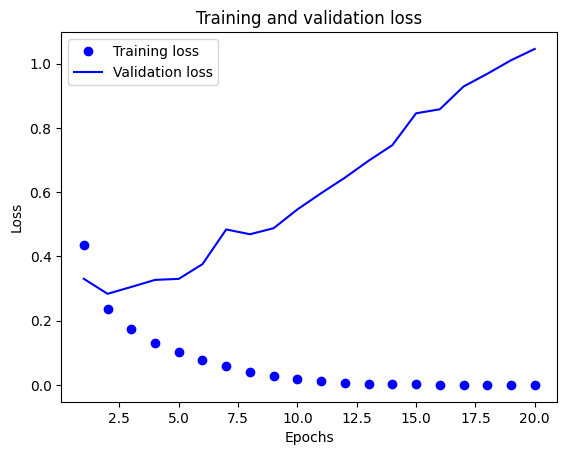

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### <div class= "alert alert-warning">Plotting the training and validation accuracy

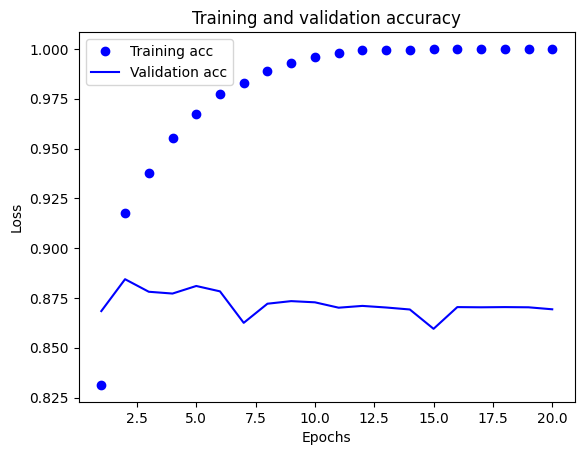

In [33]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradientdescent optimization—the quantity you’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: `after the second epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.` In this case, to prevent overfitting, you could stop training after three epochs. In general, you can use a range of techniques to mitigate overfitting, which we’ll cover in chapter 4.

Let’s train a new network from scratch for four epochs and then evaluate it on the test data.

##### <div class= "alert alert-warning">Retraining a model from scratch

In [40]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)


#  The final results are as follows:
results

Epoch 1/4
49/49 [==============================] - 5s 21ms/step - loss: 0.4640 - accuracy: 0.8158
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2755 - accuracy: 0.9026
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2169 - accuracy: 0.9216
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2861 - accuracy: 0.8855


[0.2861100733280182, 0.8855199813842773]

This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, you should be able to get close to 95%.

##### <div class= "alert alert-warning">Using a trained network to generate predictions on new data
After having trained a network, you’ll want to use it in a practical setting. You can generate
the likelihood of reviews being positive by using the predict method:

In [41]:
model.predict(x_test)

782/782 [==============================] - 29s 4ms/step


array([[0.23010969],
       [0.9996119 ],
       [0.7340831 ],
       ...,
       [0.1258998 ],
       [0.08103745],
       [0.5742282 ]], dtype=float32)

As you can see, the network is confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4).

### Further experiments
The following experiments will help convince you that the architecture choices you’ve
made are all fairly reasonable, although there’s still room for improvement:
- You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

- Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

- Try using the mse loss function instead of binary_crossentropy.

- Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

### Wrapping up
Here’s what you should take away from this example:
- You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options, too.

- Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.

- In a binary classification problem (two output classes), your network should end with a Dense layer with one unit and a sigmoid activation: the output of your network should be a scalar between 0 and 1, encoding a probability.

- With such a scalar sigmoid output on a binary classification problem, the loss function you should use is binary_crossentropy.

- The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.

- As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.